In [17]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams["figure.figsize"] = (10, 6)

In [18]:
def f1(x):
    return x * np.sin(x) + 2*x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (300 + x**2) + 20 * np.sin(x)

In [19]:
def generate_X_y(f):
    tr = 20
    n_samples = 100
    X = np.linspace(-tr, tr, n_samples)
    y = f(X)
    return X, y

def plot_f(X, y, title):
    LW = 4
    fig, ax = plt.subplots()
    ax.plot(X, y, color='cornflowerblue', linewidth=.5*LW, label="ground truth")
    fig.suptitle(title)
    #ax.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training points")

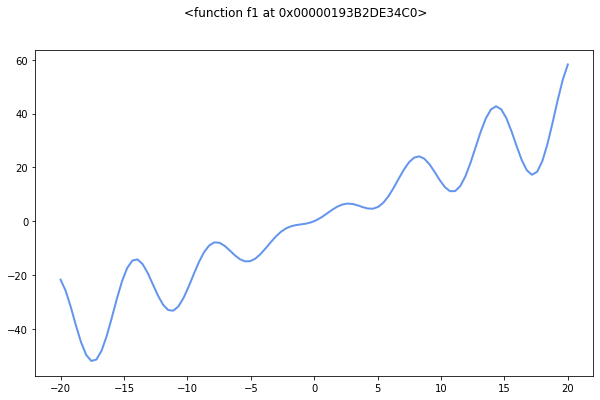

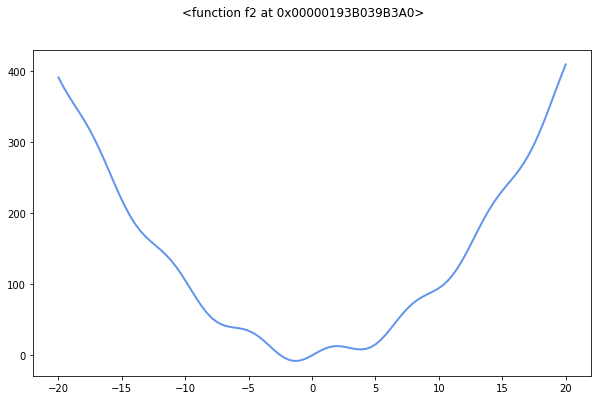

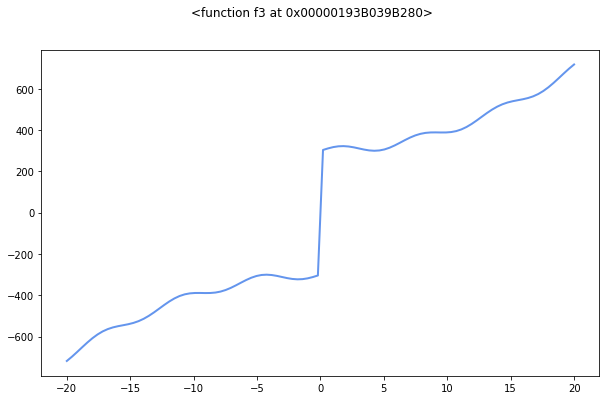

In [20]:
for f in [f1, f2, f3]:
    X, y = generate_X_y(f)
    plot_f(X, y, f)

In [21]:

def generate_train_test(f, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=30,
                                                        random_state=42,
                                                        shuffle=True)
    y_test = y_test[X_test.argsort()]
    X_test.sort()
    return X_train, X_test, y_train, y_test

In [22]:


def evaluate_model(f, X, y, model, model_name):

    X_train, X_test, y_train, y_test = generate_train_test(f, X, y)
    # plot the real function and the training points
    LW = 2
    fig, ax = plt.subplots()
    ax.plot(X, y, color='cornflowerblue', linewidth=.5*LW, label="ground truth")
    ax.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training points")

    # predict the test points and plot them onto the chart
    model.fit(X_train.reshape(-1, 1), y_train)
    y_hat = model.predict(X_test.reshape(-1, 1))

    ax.plot(X_test, y_hat, linewidth=LW, label=model_name, color='r')
    fig.suptitle(f"{f} approximated by {model_name}")
    fig.legend()

    return mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)

In [23]:


degree = 5

models = [LinearRegression(),
          Ridge(random_state=42),
          MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=10000),
          MLPRegressor(hidden_layer_sizes=(10,10), activation='tanh', solver='lbfgs',
                       alpha=0.000, batch_size='auto', learning_rate='constant',learning_rate_init=0.01,
                       power_t=0.5, max_iter=10000, shuffle=True, momentum=0.0, nesterovs_momentum=False,
                       early_stopping=False, validation_fraction=0.0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
          SVR(gamma='scale'),
          RandomForestRegressor(n_estimators=300),
          make_pipeline(
              make_column_transformer(
                  (FunctionTransformer(np.sin), [0]),
                  (PolynomialFeatures(degree), [0])
              ),
              LinearRegression()
          ),
          make_pipeline(
              make_column_transformer(
                  (FunctionTransformer(np.sin), [0]),
                  (PolynomialFeatures(degree), [0])
              ),
              Ridge(alpha=1)
          )
          ]

names = [
        'linreg',
        'ridge',
        'mlp_standard',
        'mlp_tuned',
        'svr',
        'rf',
        f'sin+poly{degree}+linreg',
        f'sin+poly{degree}+ridge'
]

+------------------+-------------------+---------------------+
|      model       |        MSE        |          R2         |
+------------------+-------------------+---------------------+
|      linreg      | 65.72227592689516 |  0.8950661957810065 |
|      ridge       | 65.74765554283469 |  0.8950256740612001 |
|   mlp_standard   | 75.46463406818695 |  0.879511306857702  |
|    mlp_tuned     | 81.64098700102106 |  0.8696499896665212 |
|       svr        | 399.9552743551347 | 0.36142155968215894 |
|        rf        | 55.75586734315045 |  0.9109788091581886 |
| sin+poly5+linreg | 95.50251981858243 |  0.8475183250164553 |
| sin+poly5+ridge  | 93.41072390557324 |  0.8508581378836475 |
+------------------+-------------------+---------------------+


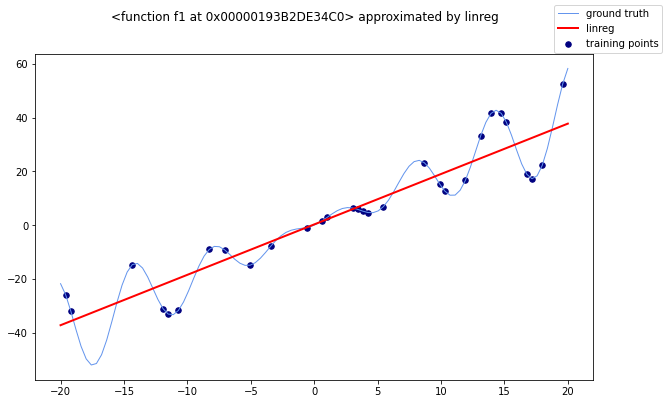

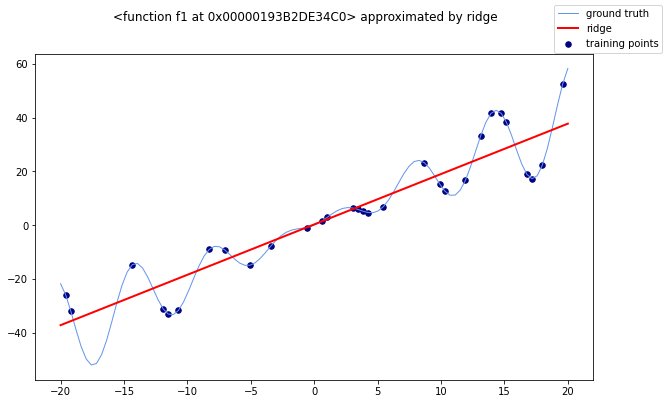

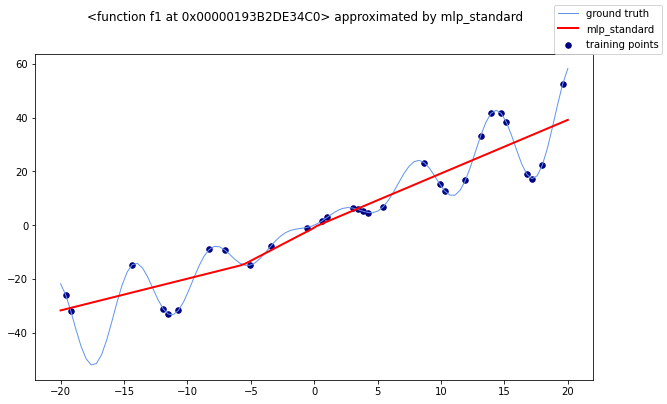

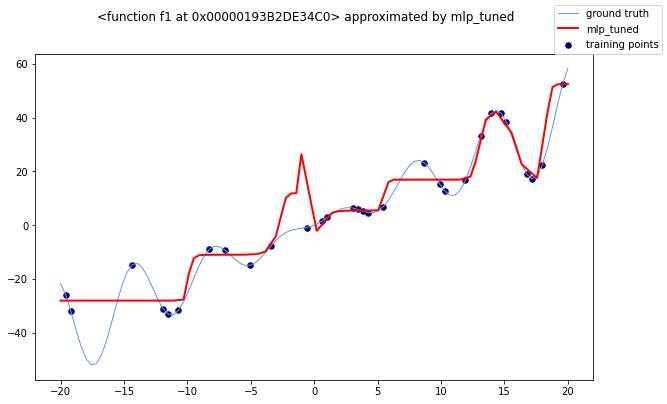

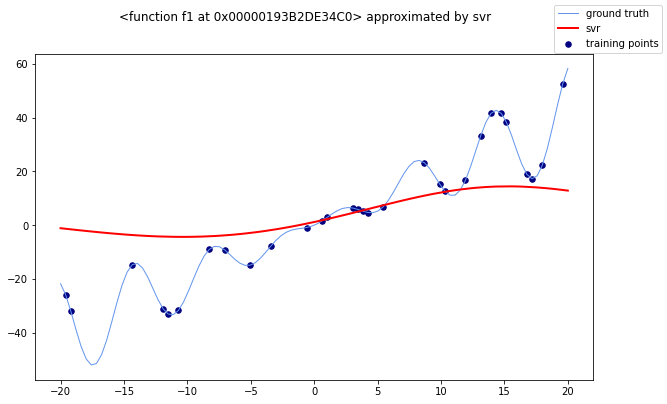

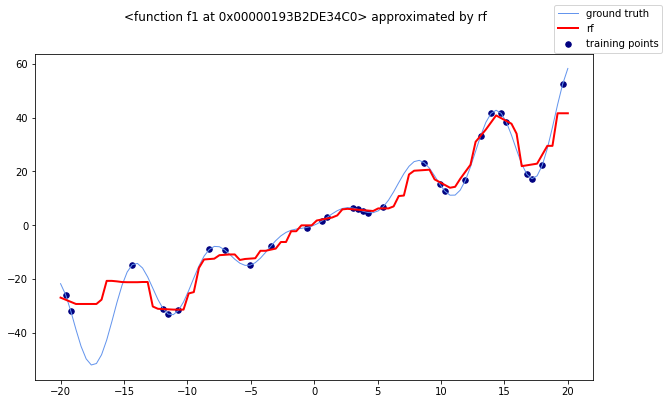

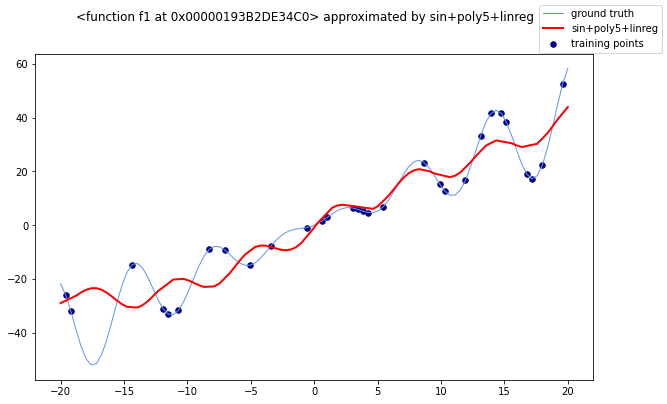

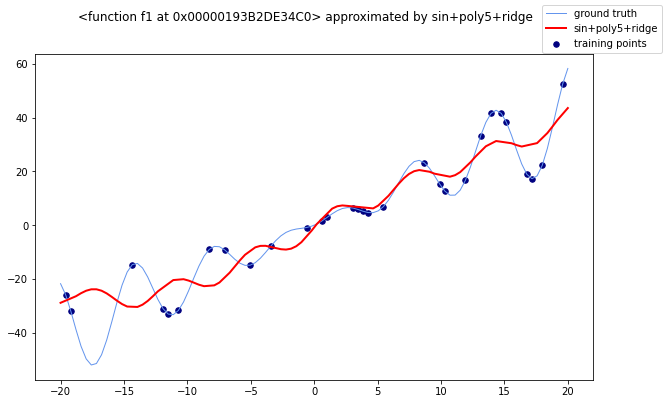

In [24]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
X, y = generate_X_y(f1)

for model, name in zip(models, names):
    mse, r2 = evaluate_model(f1, X, y, model, name)
    t.add_row([name, mse, r2])

print(t)

C:\Users\Ooweey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


+------------------+--------------------+-----------------------+
|      model       |        MSE         |           R2          |
+------------------+--------------------+-----------------------+
|      linreg      | 3286.4299540955058 |  0.14048596738913854  |
|      ridge       | 3286.469169703754  |  0.14047571116397717  |
|   mlp_standard   | 3787.2388220359862 |  0.009507289716614742 |
|    mlp_tuned     | 4675.357693956103  |  -0.22276622400625978 |
|       svr        | 3894.8763167457664 | -0.018643603024257827 |
|        rf        | 4137.4258588887005 |  -0.08207861852349052 |
| sin+poly5+linreg | 4148.189712084211  |  -0.08489373492509711 |
| sin+poly5+ridge  | 4120.642306504317  |  -0.07768914453714881 |
+------------------+--------------------+-----------------------+


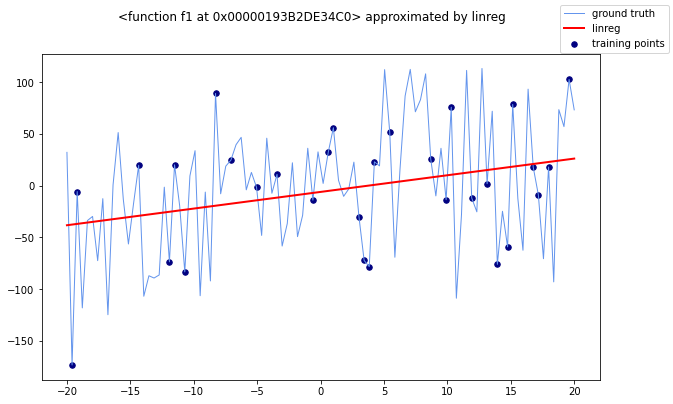

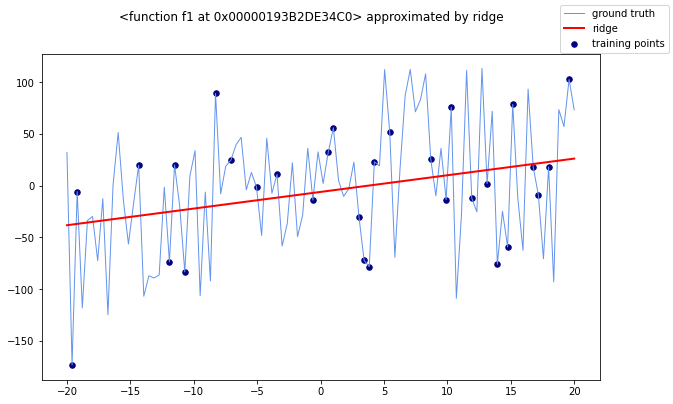

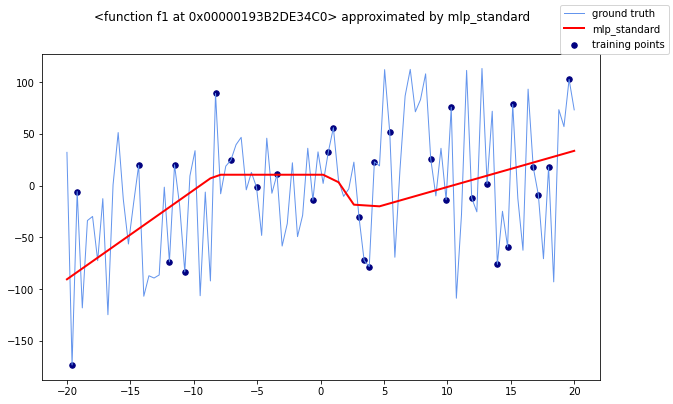

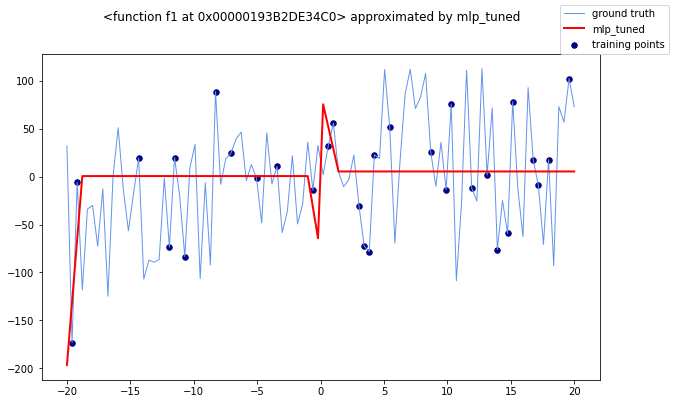

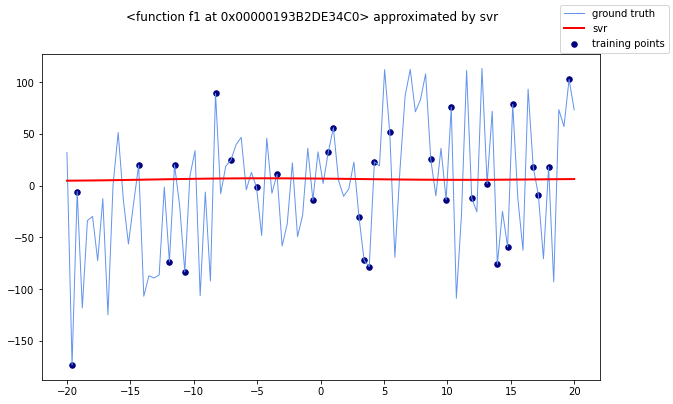

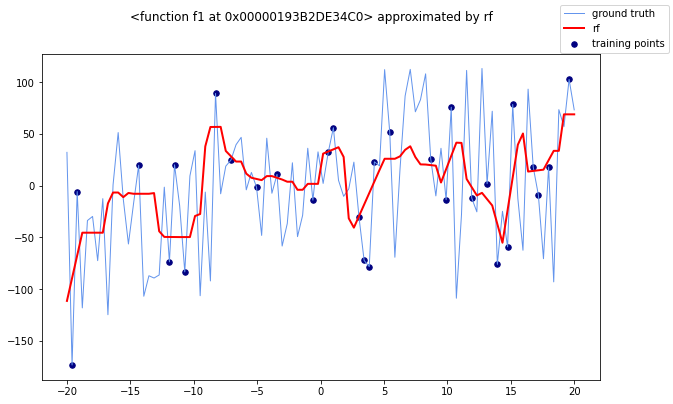

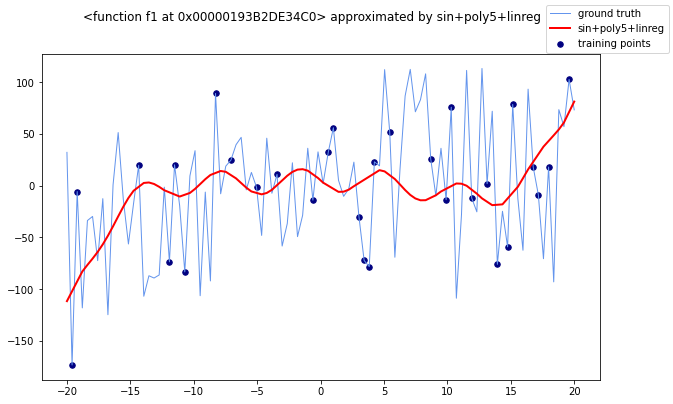

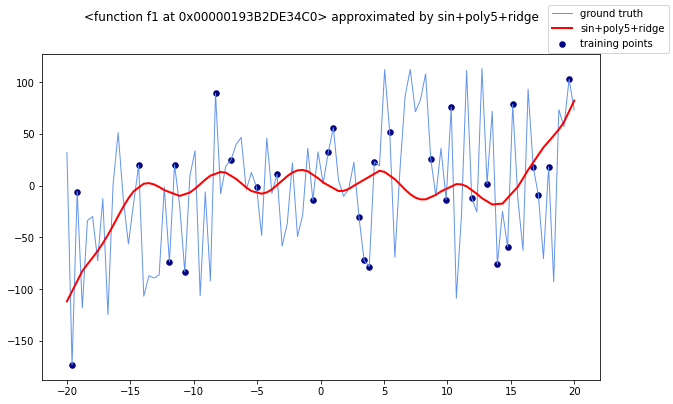

In [25]:
def inject_noise(x):
    """Add a random noise drawn from a normal distribution."""
    return x + np.random.normal(0, 50, size=x.size)

X, y = generate_X_y(f1)
y = inject_noise(y)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    mse, r2 = evaluate_model(f1, X, y, model, name)
    t.add_row([name, mse, r2])
print(t)

C:\Users\Ooweey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ooweey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+------------------+-----------------------+-----------------------+
|      model       |          MSE          |           R2          |
+------------------+-----------------------+-----------------------+
|      linreg      |   15300.007189428956  | -0.037420556511206016 |
|      ridge       |   15299.785419953305  |  -0.03740551938017744 |
|   mlp_standard   |   383.3732511676959   |   0.9740052872751137  |
|    mlp_tuned     |   2053.9909860879393  |   0.8607286620539241  |
|       svr        |   14341.447317768201  |  0.027574819189968847 |
|        rf        |   225.89176876397173  |   0.9846833559251964  |
| sin+poly5+linreg | 5.551479286536157e-23 |          1.0          |
| sin+poly5+ridge  |   0.2362383028912853  |   0.9999839818067652  |
+------------------+-----------------------+-----------------------+


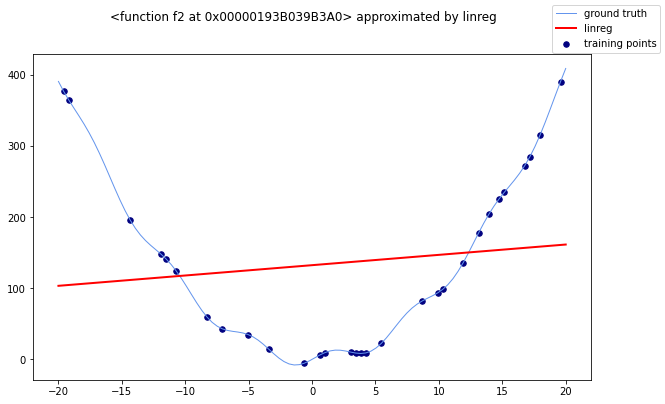

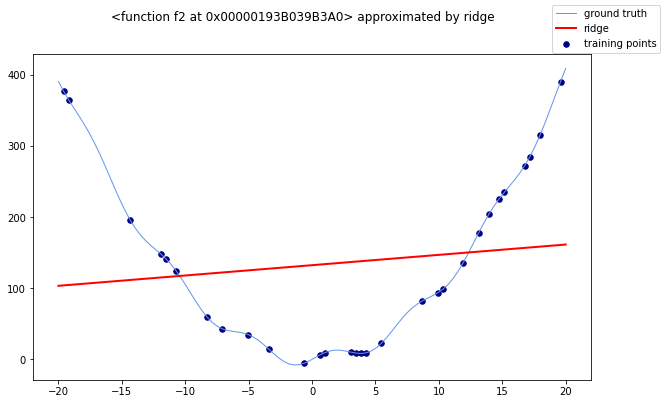

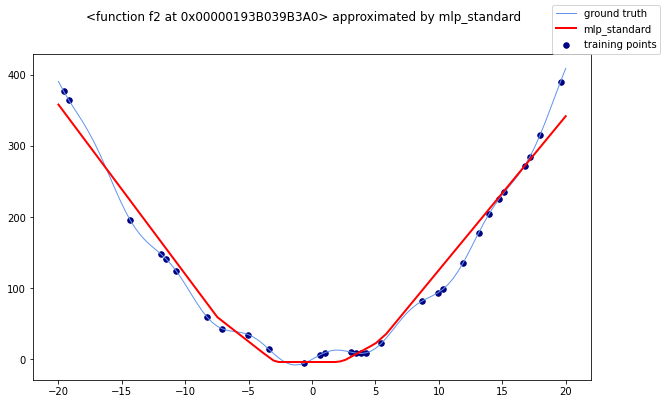

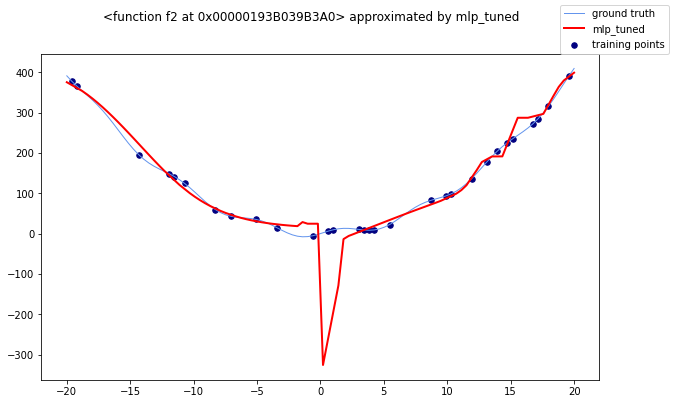

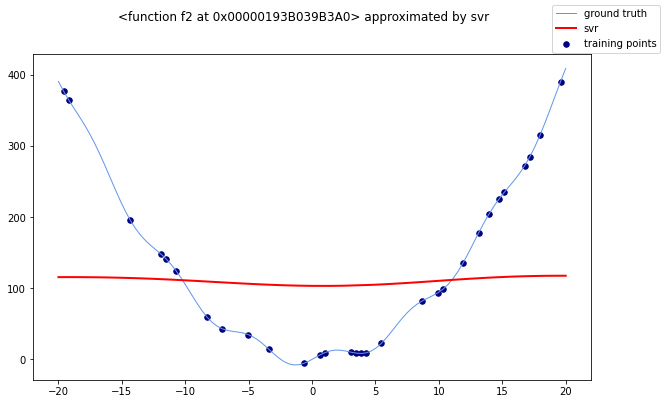

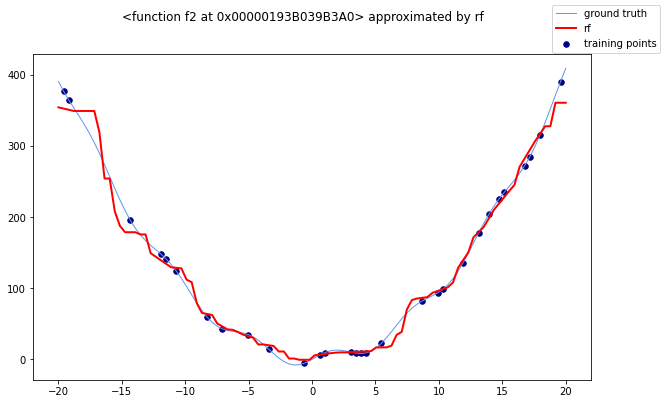

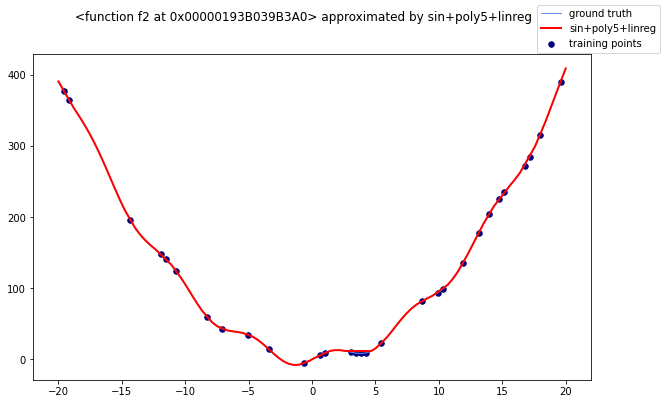

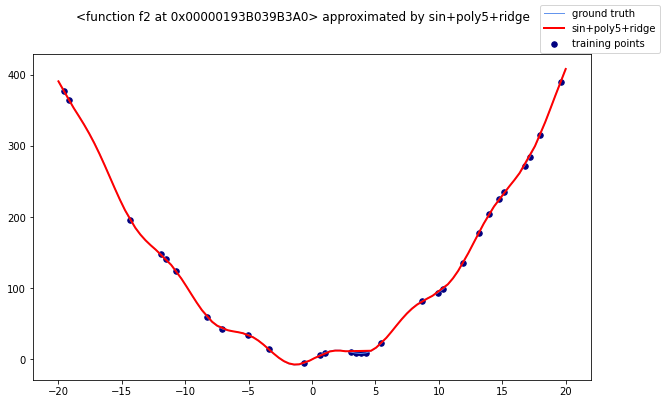

In [26]:

t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
X, y = generate_X_y(f2)

for model, name in zip(models, names):
    mse, r2 = evaluate_model(f2, X, y, model, name)
    t.add_row([name, mse, r2])
print(t)

C:\Users\Ooweey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


+------------------+--------------------+-----------------------+
|      model       |        MSE         |           R2          |
+------------------+--------------------+-----------------------+
|      linreg      | 19342.653303952007 | -0.051318951242683264 |
|      ridge       | 19342.31372830091  | -0.051300494502970695 |
|   mlp_standard   | 3117.9392257955387 |   0.8305326293455276  |
|    mlp_tuned     | 18822.113596118168 | -0.023026387077857313 |
|       svr        | 18717.995349712113 | -0.017367314152506808 |
|        rf        | 4890.0199300091135 |   0.7342158522107916  |
| sin+poly5+linreg | 4005.8556357831585 |   0.7822722725955761  |
| sin+poly5+ridge  | 3958.442887302749  |   0.7848492676036897  |
+------------------+--------------------+-----------------------+


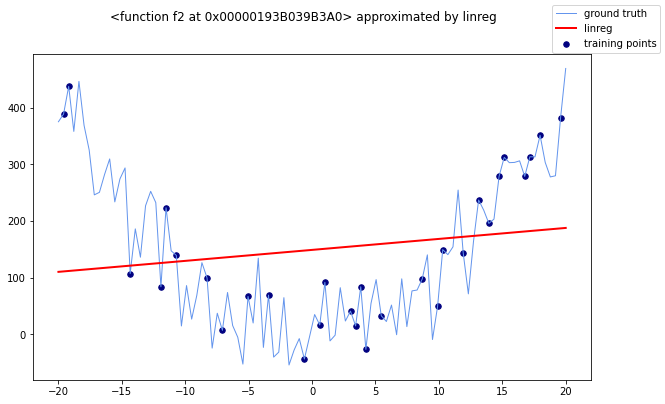

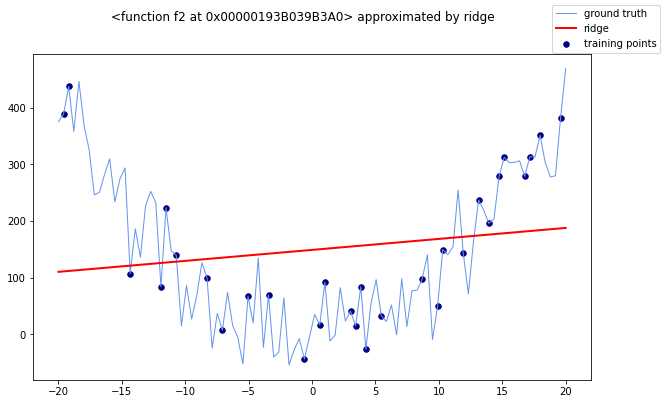

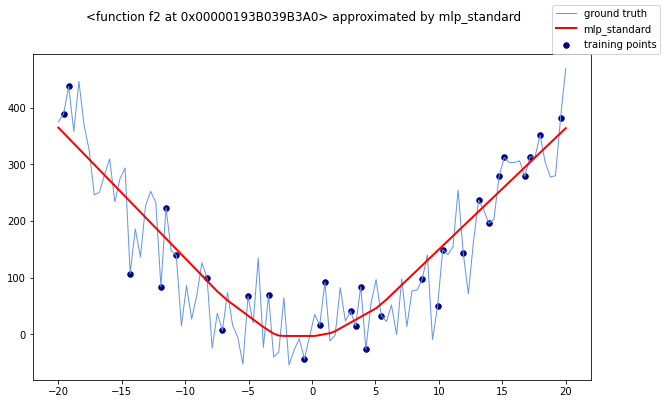

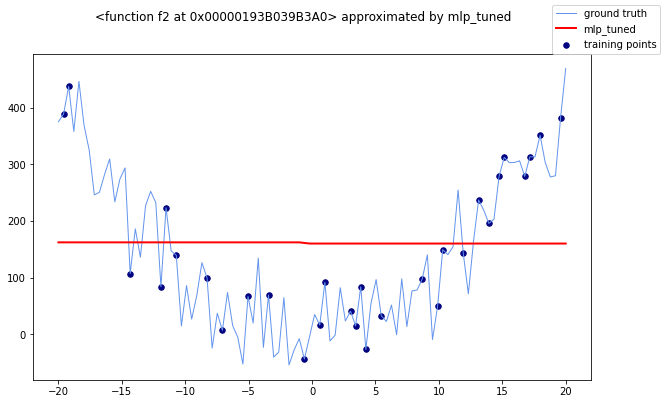

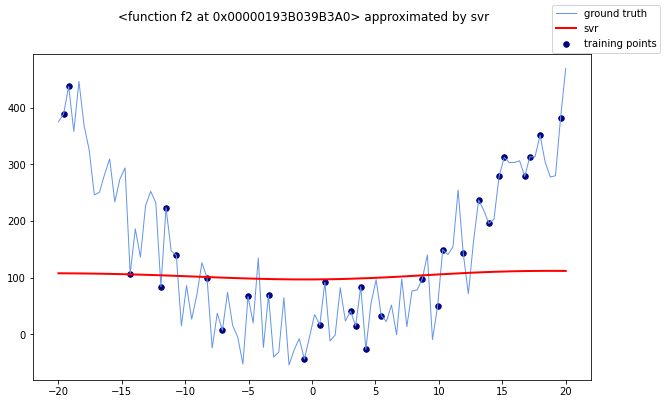

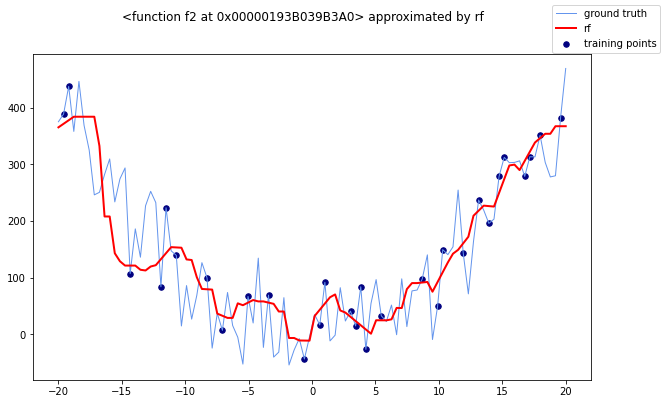

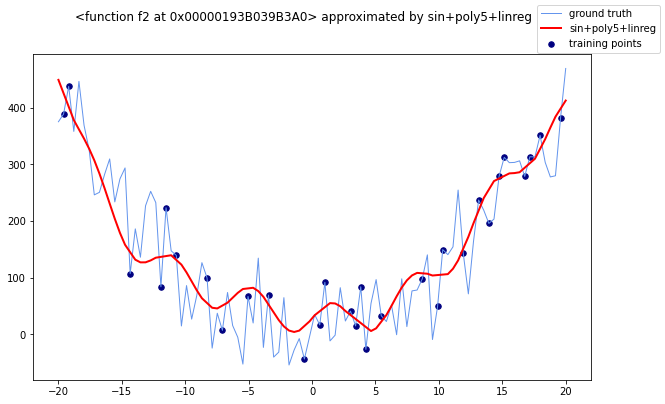

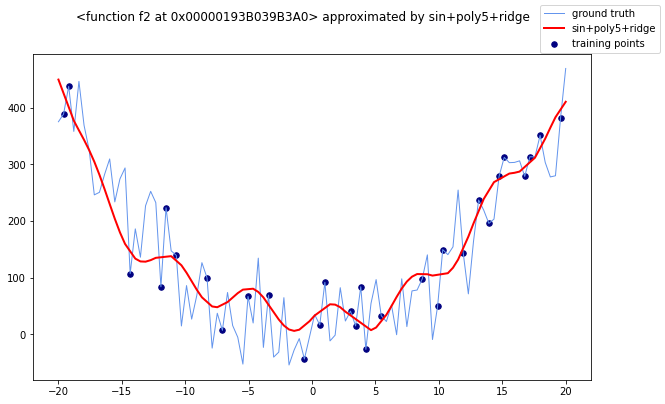

In [27]:
X, y = generate_X_y(f2)
y = inject_noise(y)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    mse, r2 = evaluate_model(f2, X, y, model, name)
    t.add_row([name, mse, r2])
print(t)

C:\Users\Ooweey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


+------------------+--------------------+---------------------+
|      model       |        MSE         |          R2         |
+------------------+--------------------+---------------------+
|      linreg      | 15760.86079984127  |  0.9222471586304892 |
|      ridge       | 15763.614946346863 |  0.9222335716367914 |
|   mlp_standard   | 11102.721825876006 |  0.9452270926150279 |
|    mlp_tuned     | 14203.230027902362 |  0.9299313974459258 |
|       svr        | 326343.75456681015 | -0.6099472295967054 |
|        rf        | 1843.7082996139502 |  0.9909044587873667 |
| sin+poly5+linreg | 9562.724944250807  |  0.9528243383979328 |
| sin+poly5+ridge  | 9517.044840939645  |  0.9530496914336333 |
+------------------+--------------------+---------------------+


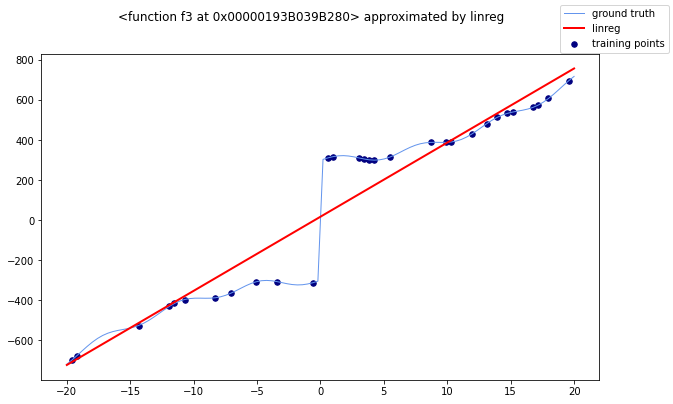

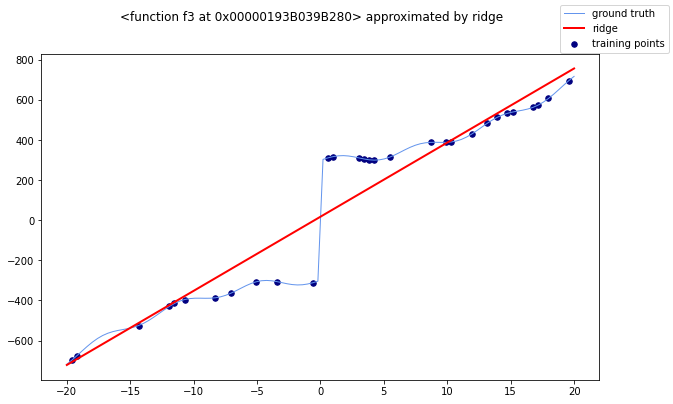

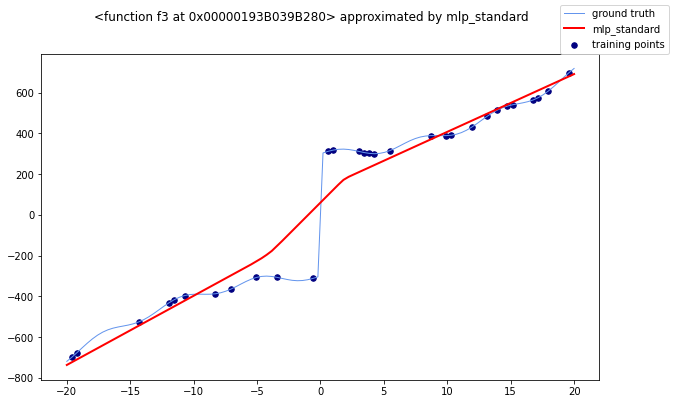

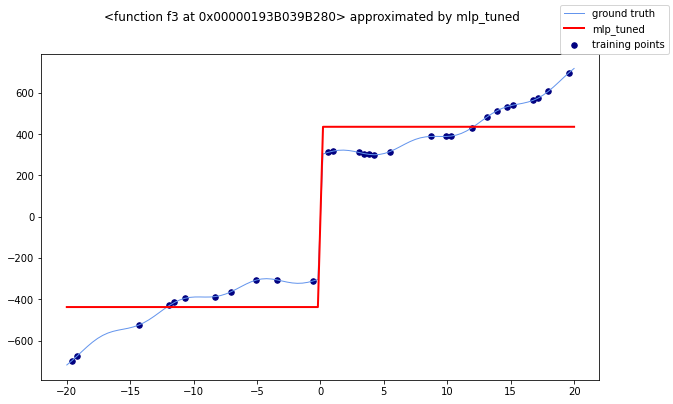

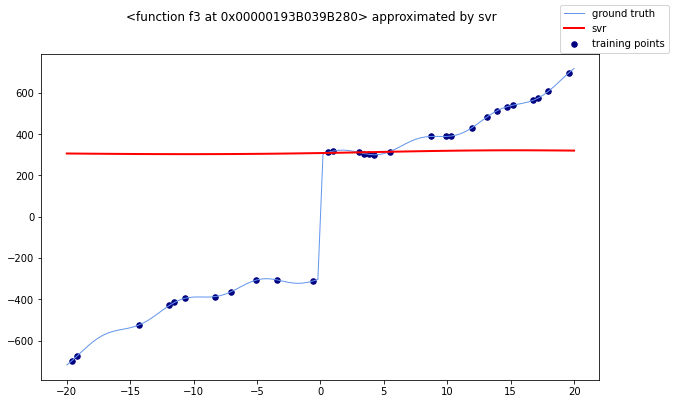

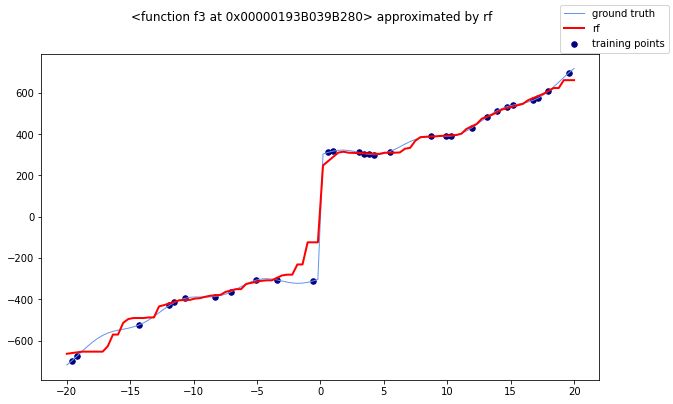

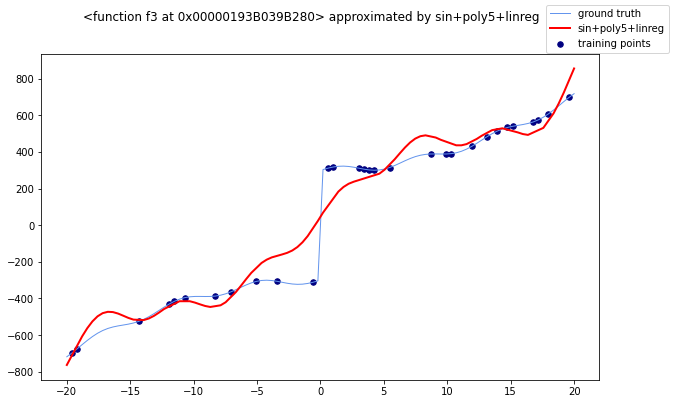

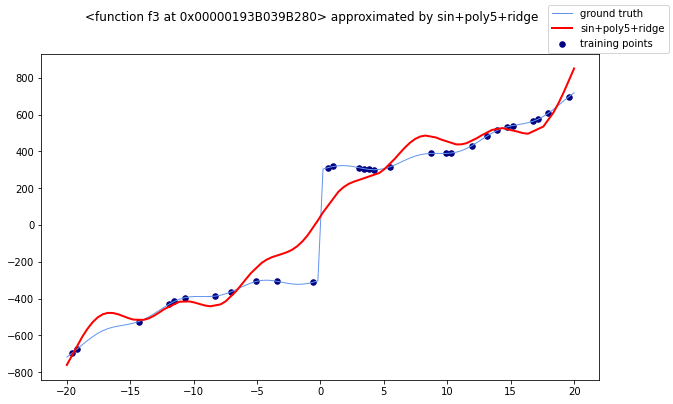

In [28]:

t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
X, y = generate_X_y(f3)

for model, name in zip(models, names):
    mse, r2 = evaluate_model(f3, X, y, model, name)
    t.add_row([name, mse, r2])
print(t)

C:\Users\Ooweey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


+------------------+--------------------+---------------------+
|      model       |        MSE         |          R2         |
+------------------+--------------------+---------------------+
|      linreg      | 15652.594208580354 |  0.9242500027453252 |
|      ridge       | 15649.688156956125 |  0.9242640664461804 |
|   mlp_standard   | 12535.350650155166 |  0.9393357570839523 |
|    mlp_tuned     | 20086.94555020316  |  0.902790166920152  |
|       svr        | 324283.6328298912  | -0.5693554671681587 |
|        rf        | 4871.103914225175  |  0.9764265205362876 |
| sin+poly5+linreg | 11067.348634513739 |  0.9464400841477523 |
| sin+poly5+ridge  | 10904.683390171724 |  0.9472272949862971 |
+------------------+--------------------+---------------------+


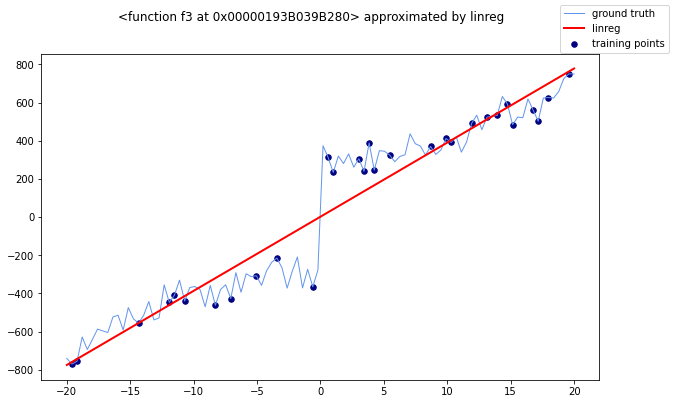

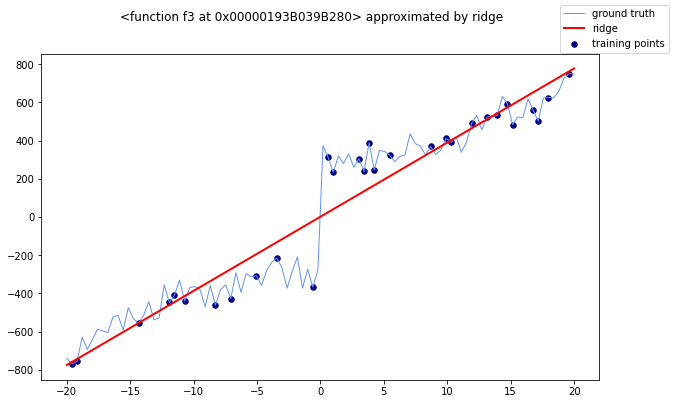

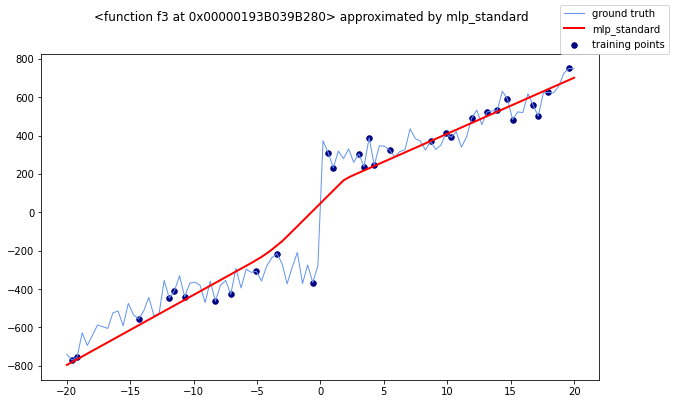

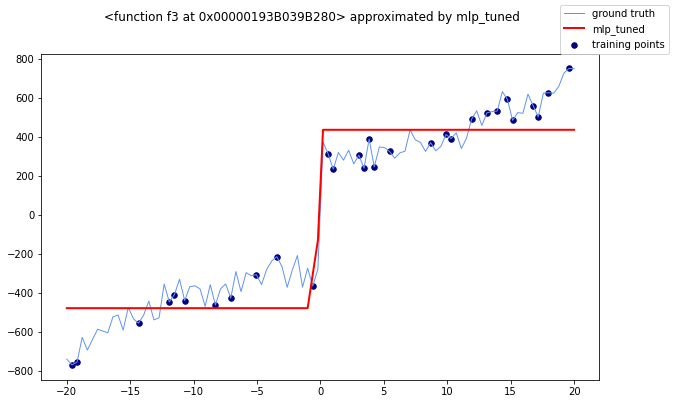

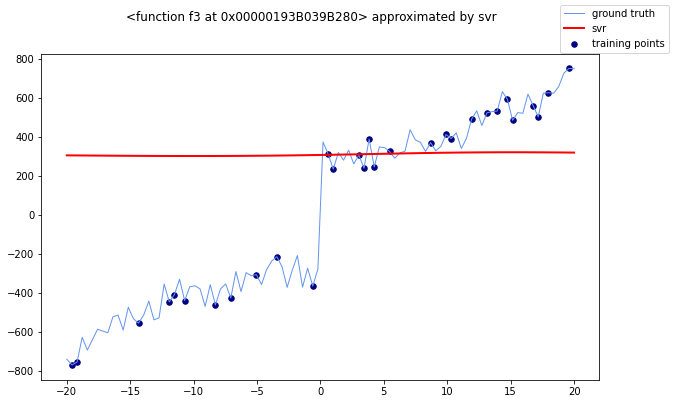

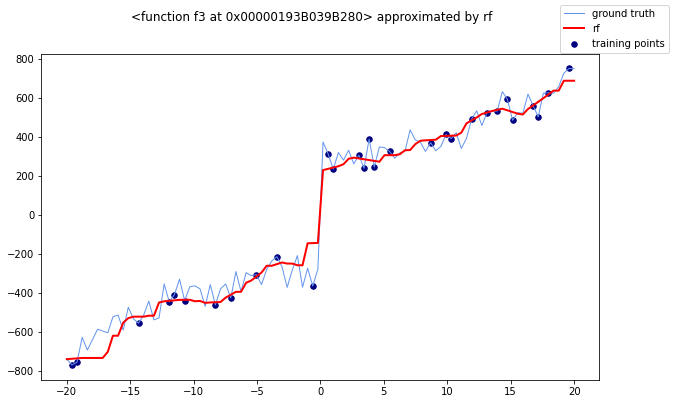

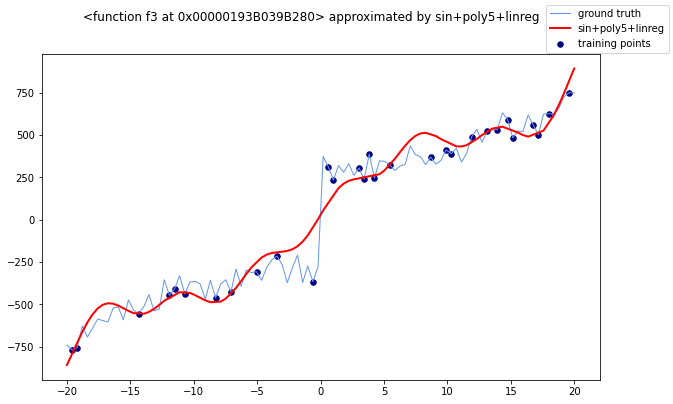

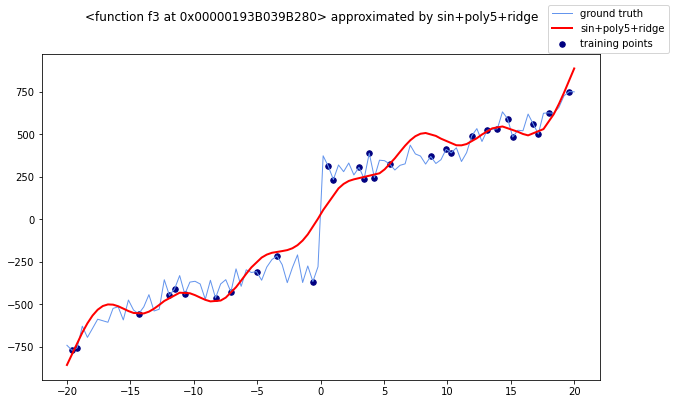

In [29]:
X, y = generate_X_y(f3)
y = inject_noise(y)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    mse, r2 = evaluate_model(f3, X, y, model, name)
    t.add_row([name, mse, r2])

print(t)